# **amir mohammad ramezan naderi- 610398126- Q1**

<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <p></p>
        ابتدا کتابخانه ها و تابع های مورد نظر را ایمپورت می‌کنیم.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import seaborn as sns
from sklearn.metrics import accuracy_score ,classification_report, confusion_matrix, f1_score

<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <p></p>
        سپس دیتاست را با پارامتر های خواسته شده دانلود می‌کنیم. این دیتاست افرادی که از آن ها بیش از ۱۵۰ عکس موجود است را نمایش می‌دهد.

In [3]:
lfw_people = fetch_lfw_people(min_faces_per_person=150, resize=0.4)

In [4]:
len(lfw_people)

5

<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <p></p>
        اکنون میبینیم که سایز دیتا و سایز تارگت ما چه اندازه ای است:

In [5]:
lfw_people.data.shape

(766, 1850)

In [6]:
lfw_people.target.shape

(766,)

<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <p></p>
        حال میبینیم که تعداد ویژگی های ما چه اندازه ای است:

In [7]:
lfw_people.data[0].shape

(1850,)

<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <p></p>
        اکنون x و y را می‌سازیم.

In [8]:
X = lfw_people.data
y = lfw_people.target

<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <p></p>
        اسم افرادی را که روی آن ها calssification می‌خواهیم انجام دهیم را می‌بینیم و متوجه می‌شویم که با یک مسئله binary classification طرف هستیم.

In [9]:
lfw_people.target_names

array(['Colin Powell', 'George W Bush'], dtype='<U13')

<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <p></p>
        حال داده های ترین و تست را با پارامتر ۰.۲۵ جدا می‌کنیم.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
print("shape of training set: ", X_train.shape)
print("shape of test set: ", X_test.shape)

shape of training set:  (574, 1850)
shape of test set:  (192, 1850)


<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <p></p>
        داده ها را با تابع standardScalar نرمال سازی می‌کنیم.

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <p></p>
        اکنون سایز تصویرمان را در مقادیر h = height و w = width می‌ریزیم.

In [13]:
_, h, w = lfw_people.images.shape

<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <p></p>
        حال تعدادی از تصاویرمان را می‌بینیم:

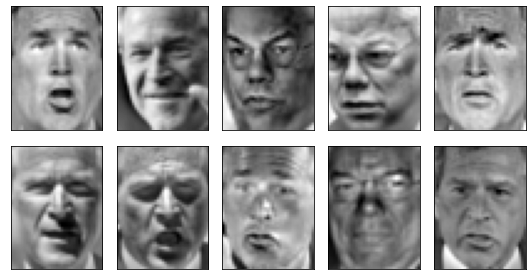

In [14]:
plt.figure(figsize=(7.5, 4.4))
plt.subplots_adjust(0.6, 0.5, 1.5, 1.5)
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i].reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()
plt.show()

<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <p></p>
        حال می‌خواهیم تعداد ویژگی ها را برای فیت کردن مدلمان کمتر کنیم. برای این از pca استفاده می‌کنیم. به این شکل که این ۱۸۵۰ ویژگی را به ۵۰ ویژگی تبدیل می‌کنیم.

In [15]:
pca = PCA(n_components=50, svd_solver="randomized").fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [16]:
X_train_pca.shape

(574, 50)

<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <p></p>
        مدل MLPclassifier مان را می‌سازیم. به این شکل که از optimizer lbfgs استفاده می‌کنیم و تعداد نورون های لایه های هیدن مان به ترتیب برابر ۲۵ و ۵ می باشد و در آخر یک لابه ۲ نورون برای خروجی طراحی می‌کنیم. و همچنین مقدار alpha که همان L2 regularization term می‌باشد را برابر ۰.۰۰۰۵ می‌گذاریم. داریم:

In [47]:
clf = MLPClassifier(solver='lbfgs', alpha=0.0005, hidden_layer_sizes=(25, 5, 2), random_state=1)

<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <p></p>
        حال مدلمان را بر وری دادگان ترین ست, ترین می‌دهیم:

In [48]:
clf.fit(X_train_pca, y_train)

MLPClassifier(alpha=0.0005, hidden_layer_sizes=(25, 5, 2), random_state=1,
              solver='lbfgs')

<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <p></p>
        حال داده های تست ست مان را پیشبینی می‌کنیم که مربوط به کدام فرد است.

In [49]:
y_predict_test = clf.predict(X_test_pca)

In [50]:
y_predict_test

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1])

<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <p></p>
        تابعی تعریف می‌کنیم به نام evaluate که مقدار دقت مدلمان را بر روی هر دیتاستی اندازه گیری کند. این تابع دقت مدل, f1-score, ماتریس کانفیوژن و roc-score را نمایش می‌دهد.

In [51]:
def evaluate(y, y_preds):
    print('acc score is: ',accuracy_score(y,y_preds))

    print(confusion_matrix(y, y_preds, labels=[1,0]))
    print (classification_report(y, y_preds))

    print('f1-score is: ',f1_score(y, y_preds, average='weighted'))

    cm = confusion_matrix(y, y_preds)
    fig, ax = plt.subplots(figsize=(4,4))
    sns.heatmap(cm, annot=True)
    plt.show()

    score = roc_auc_score(y, y_preds)
    print('ROC-AUC Score is: ', score)
    fpr, tpr, thresholds = roc_curve(y, y_preds)
    plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' % score)
    plt.plot([0,1], [0,1], 'k--')
    plt.legend()
    plt.show()

acc score is:  0.9322916666666666
[[127   6]
 [  7  52]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        59
           1       0.95      0.95      0.95       133

    accuracy                           0.93       192
   macro avg       0.92      0.92      0.92       192
weighted avg       0.93      0.93      0.93       192

f1-score is:  0.932129109446525


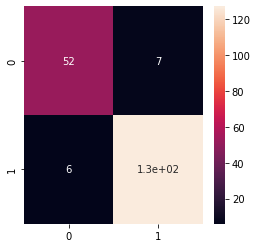

ROC-AUC Score is:  0.9181215751242513


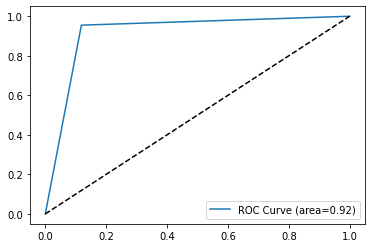

In [52]:
evaluate(y_test, y_predict_test)

<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <p></p>
        همانطور که مشاهده می‌کنید دقت این مدل بر روی تست ست برابر ۹۳ درصد, f1-score برابر ۹۳ درصد, roc-score برابر ۹۲ درصد و ماتریس کانفیوژن را می‌توانید از طریق شکل ببینید. به این صورت که ۱۲۸ تا از تصاویر را به درستی لیبل ۱ داد و ۵۱ تصویر را به درستی گفت که دارای لیبل ۰ هستند.

<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <p></p>
        در آخر کافی‌است این مدل را بر روی دیتا ست ترین اجرا کنیم و تصاویر را پیش‌بینی کنیم که مال کدام فرد است و دقت مدل را اندازه بگیریم:

In [53]:
y_predict_train = clf.predict(X_train_pca)

acc score is:  0.9947735191637631
[[394   3]
 [  0 177]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       177
           1       1.00      0.99      1.00       397

    accuracy                           0.99       574
   macro avg       0.99      1.00      0.99       574
weighted avg       0.99      0.99      0.99       574

f1-score is:  0.9947855680152484


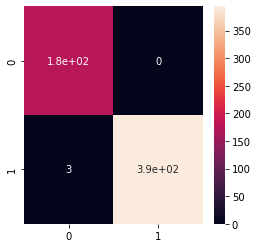

ROC-AUC Score is:  0.9962216624685138


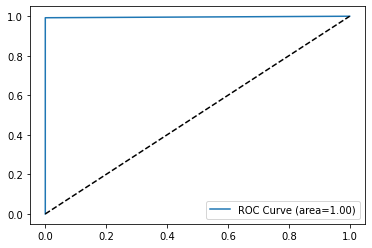

In [54]:
evaluate(y_train, y_predict_train)

<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <p></p>
        همانطور که مشاهده می‌کنید دقت این مدل بر روی دیتای ترین برابر ۹۹ درصد می‌باشد و تقریباً همه تصاویر را به درستی تشخیص داد به غیر از ۳ تصویر که به اشتباهی لیبل دیگری را به آن ها اختصاص داد.

<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=3>
        <p></p>
        در آخر می‌توان گفت مدل خوبی طراحی کردیم و طبق درصد های دیتاست تست و ترین, مدلمان مشکل overfitting و یا underfitting  ندارد.